- two FC layers
- resnet34 with 3 FC layers
- TTA

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [3]:
from sklearn.metrics import fbeta_score

In [4]:
thresh=0.2

In [5]:
def f2(preds, targs):
    return fbeta_score(targs, (preds>thresh), 2, average='samples')

In [6]:
bs=64; sz=128; metrics=[accuracy_thresh(thresh), f2]
f_model = resnet34
path = "/data/jhoward/fast/planet/"

In [7]:
augs = [RandomRotate(10), RandomDihedral()]#, RandomLighting(0.05, 0.05)]
#augs=[]

## Train

In [8]:
n=len(list(open(f'{path}train_v2.csv')))-1

In [9]:
val_pct=0.2
np.random.seed(42)
val_idxs=np.random.permutation(n)[:int(val_pct*n)]

In [10]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=augs)

In [18]:
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [19]:
learn = Learner(resnet34, ds, xtra_fc=[512], ps=0.01, opt_fn=SGD_Momentum(0.9), metrics=metrics)

-- freeze 9999


In [66]:
lrf=learn.lr_find(True)

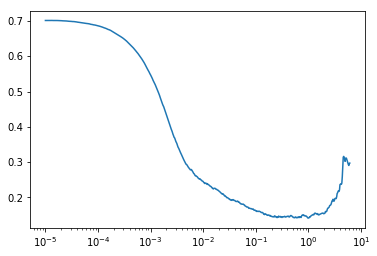

In [67]:
lrf.plot()

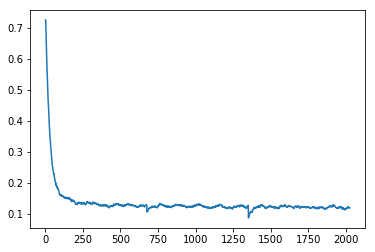

In [40]:
learn.sched.plot_loss()

In [20]:
learn.fit_fc(3, 0.2, cycle_len=1)

[0.1232460846269304, 0.11722549, 0.936804, 0.89653629]


[0.11430424816834688, 0.111563, 0.93952596, 0.90137917]


[0.10911063717875193, 0.1090757, 0.94116241, 0.90407038]


In [21]:
learn.freeze_to(-3)

-- freeze -3


In [22]:
lrf = learn.lr_find(start_lr=1e-7)

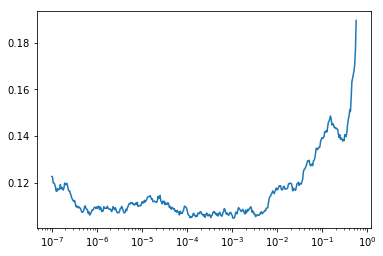

In [23]:
lrf.plot()

In [24]:
learn.fit(2, 1e-2, cycle_len=1)

[0.09774952818029381, 0.10353403, 0.9453097, 0.90862906]


[0.09946540887901476, 0.10175493, 0.9458372, 0.90969926]


In [25]:
learn.unfreeze()

-- freeze 0


In [26]:
lrf = learn.lr_find(start_lr=1e-7)

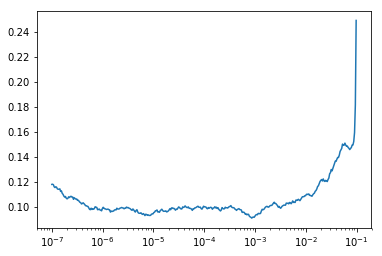

In [27]:
lrf.plot()

In [28]:
learn.fit(6, 1e-2, cycle_len=3)

[0.09787796090114119, 0.097215995, 0.94660395, 0.91177768]


[0.09112477895690853, 0.091748916, 0.95040911, 0.92023891]


[0.08497584356679933, 0.090415224, 0.95203811, 0.92065853]


[0.09037508202099623, 0.094251476, 0.95244378, 0.91600543]


[0.08574195891774573, 0.089447021, 0.95412368, 0.92122126]


[0.08358002889340782, 0.088485815, 0.95364565, 0.92245287]


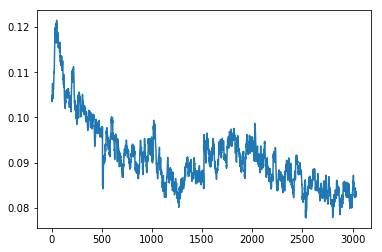

In [29]:
learn.sched.plot_loss()

In [30]:
learn.save('128')

In [31]:
tfms = ClassifierData.tfms_from_model(f_model, 256, aug_tfms=augs)

In [32]:
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [33]:
learn = Learner(resnet34, ds, xtra_fc=[512], ps=0.01, opt_fn=SGD_Momentum(0.9), metrics=metrics)

-- freeze 9999


In [34]:
learn.load('128')

In [ ]:
learn.fit(6, 1e-2, cycle_len=3)

[0.09061264646393968, 0.093779035, 0.94978863, 0.91627765]


In [ ]:
learn.sched.plot_loss()

### Import data

In [15]:
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (None,None),
               suffix='.jpg')

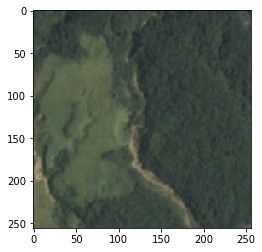

In [21]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

## End

In [ ]:
tfm=lambda x: apply_gen(x, augs+[RandomScaleCenter(128, 1.05)])
ds = ClassifierData.from_paths(path, tfm, tfm, 2)
x,y=next(iter(ds.val_dl))
plt.imshow(x[0].numpy());

In [ ]:
PIL.Image.open(ds_scl.val_dl.dataset.fnames[0])